Success!
Success!
Success!
Success!
Success!


Text(2009-02-01 00:00:00, -1000, 'Source: Energy Information Administration www.eia.gov')

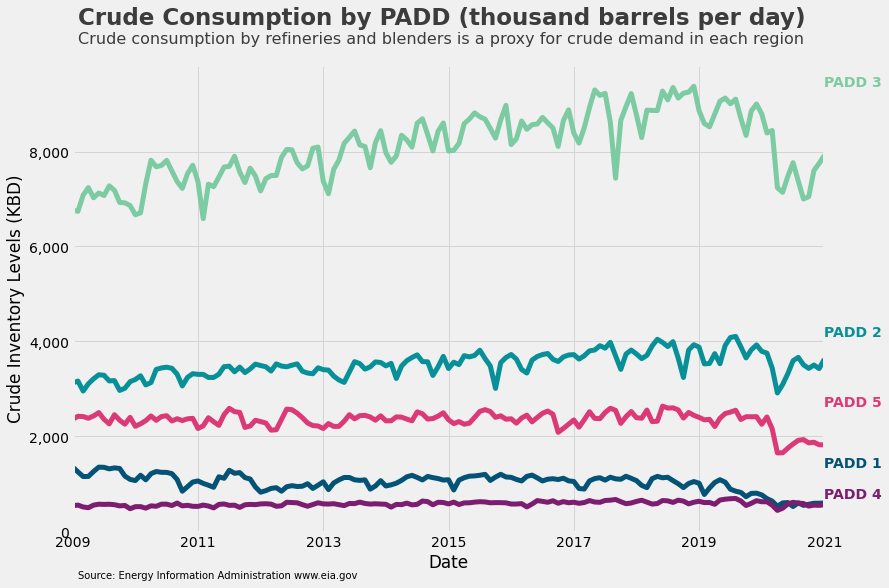

In [7]:
#Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import matplotlib.ticker as ticker






# API Key from EIA
api_key = '4Cgy5BurMNMAhbo0RBIu3s5FFyyo37QEVmW0uBoz'
# PADD Names to Label Columns
# Change to whatever column labels you want to use.
PADD_NAMES = ['PADD 1','PADD 2','PADD 3','PADD 4','PADD 5']
# Enter all your Series IDs here separated by commas
PADD_KEY = ['PET.MCRRIP12.M',
'PET.MCRRIP22.M',
'PET.MCRRIP32.M',
'PET.MCRRIP42.M',
'PET.MCRRIP52.M']
# Initialize list - this is the final list that you will store all the data from the json pull. Then you will use this list to concat into a pandas dataframe. 
final_data = []
# Choose start and end dates
startDate = '2009-01-01'
endDate = '2021-01-01'





# Pull in data via EIA API
for i in range(len(PADD_KEY)):
    url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + PADD_KEY[i]
    r = requests.get(url)
    json_data = r.json()
    
    if r.status_code == 200:
        print('Success!')
    else:
        print('Error')
    
    df = pd.DataFrame(json_data.get('series')[0].get('data'),
                      columns = ['Date', PADD_NAMES[i]])
    df.set_index('Date', drop=True, inplace=True)
    final_data.append(df)





# Combine all the data into one dataframe
crude = pd.concat(final_data, axis=1)
# Create date as datetype datatype
crude['Year'] = crude.index.astype(str).str[:4]
crude['Month'] = crude.index.astype(str).str[4:]
crude['Day'] = 1
crude['Date'] = pd.to_datetime(crude[['Year','Month','Day']])
crude.set_index('Date',drop=True,inplace=True)
crude.sort_index(inplace=True)
crude = crude[startDate:endDate]
crude = crude.iloc[:,:5]




# Generating Colours and Style
colors = {'PADD 1':'#045275', 
          'PADD 2':'#089099', 
          'PADD 3':'#7CCBA2', 
          'PADD 4':'#7C1D6F', 
          'PADD 5':'#DC3977'}
plt.style.use('fivethirtyeight')
# Creating the Visualization
plot = crude.plot(figsize=(12,8), 
                  color=list(colors.values()), 
                  linewidth=5, 
                  legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Crude Inventory Levels (KBD)')
# Assigning Colour
for padd in list(colors.keys()):
    plot.text(x = crude.index[-1], y = crude[padd].max(), color = 
    colors[padd], s = padd, weight = 'bold')
# Adding Labels
plot.text(x = crude.index[1], 
          y = int(crude.max().max())+1300, 
          s = "Crude Consumption by PADD (thousand barrels per day)", 
          fontsize = 23, 
          weight = 'bold', 
          alpha = .75)
plot.text(x = crude.index[1], 
          y = int(crude.max().max())+900, 
          s = "Crude consumption by refineries and blenders is a proxy for crude demand in each region", 
          fontsize = 16, 
          alpha = .75)
plot.text(x = crude.index[1], 
          y = -1000,
          s = 'Source: Energy Information Administration www.eia.gov', 
          fontsize = 10)

In [6]:
final_data[0]

,PADD 1
Date,
202110,634
202109,704
202108,683
202107,674
202106,717
...,...
198105,1140
198104,1286
198103,1399
